## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [4]:
print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [18]:
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [74]:
#adding new column 

df.insert(13,'price',boston.target , True)
#df.drop('price', inplace=True, axis=1)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Q2: Print the head rows of the dataframe.

In [75]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     506 non-null    float64
 1   (ZN,)       506 non-null    float64
 2   (INDUS,)    506 non-null    float64
 3   (CHAS,)     506 non-null    float64
 4   (NOX,)      506 non-null    float64
 5   (RM,)       506 non-null    float64
 6   (AGE,)      506 non-null    float64
 7   (DIS,)      506 non-null    float64
 8   (RAD,)      506 non-null    float64
 9   (TAX,)      506 non-null    float64
 10  (PTRATIO,)  506 non-null    float64
 11  (B,)        506 non-null    float64
 12  (LSTAT,)    506 non-null    float64
 13  (price,)    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Q3: Use histogram to show the distribution of House Prices.

<AxesSubplot:ylabel='Density'>

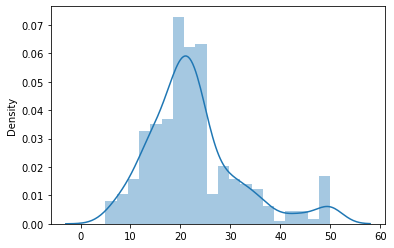

In [77]:
sns.distplot(df['price'], bins=20)

## Q4: Use a heatmap to show the correlation between features and the target labels.

<AxesSubplot:xlabel='None', ylabel='None'>

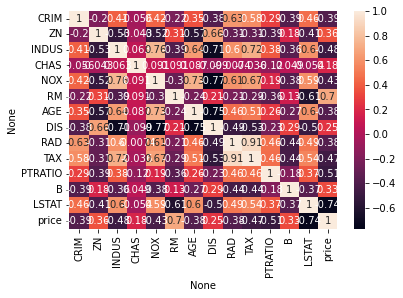

In [78]:
sns.heatmap(df.corr(), annot=True)


## Q5: Use a lmplot to draw the relations between price and LSTAT.

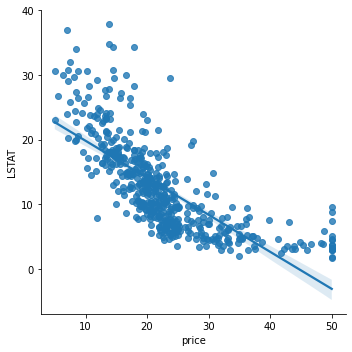

In [79]:
sns.lmplot(x="price", y="LSTAT", data=df)

## Q6: Use a lmplot to draw the relations between price and RM.

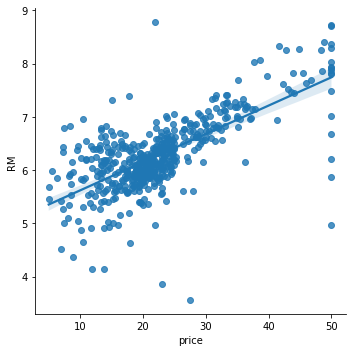

In [80]:
sns.lmplot(x="price", y="RM", data=df)

In [81]:
df.columns

MultiIndex([(   'CRIM',),
            (     'ZN',),
            (  'INDUS',),
            (   'CHAS',),
            (    'NOX',),
            (     'RM',),
            (    'AGE',),
            (    'DIS',),
            (    'RAD',),
            (    'TAX',),
            ('PTRATIO',),
            (      'B',),
            (  'LSTAT',),
            (  'price',)],
           )

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [93]:
#splitting the data
X = df[['CRIM', 'ZN', 'INDUS','CHAS', 'NOX','RM','AGE' ,'DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['price']
X.shape

(506, 13)

In [83]:
#into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

## Q8: Build a Linear Regression Model.

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()

## Q9: Train the Model.

In [86]:
lm.fit(X_train,y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [87]:
print(lm.intercept_)


[35.66404435]


In [108]:
coeff_df = pd.DataFrame(lm.coef_.ravel(), X.columns, columns=['coffe']) #rael will reshape the dataframe
coeff_df

,coffe
CRIM,-0.114174
ZN,0.042126
INDUS,-0.015287
CHAS,3.541580
NOX,-16.152826
RM,4.170336
AGE,-0.008715
DIS,-1.491292
RAD,0.363231
TAX,-0.015788


In [109]:
predictions = lm.predict(X_test)
predictions

array([[17.39147327],
       [12.41363413],
       [19.85934436],
       [31.50042761],
       [15.75702458],
       [17.73775642],
       [20.17320567],
       [41.71916027],
       [15.46522809],
       [24.26095398],
       [20.01457803],
       [33.07568558],
       [21.68100058],
       [29.718935  ],
       [12.93159771],
       [24.28727871],
       [14.44400397],
       [28.05153449],
       [15.20149991],
       [27.09665867],
       [20.82169746],
       [17.95261421],
       [31.0691493 ],
       [13.16333568],
       [15.63311811],
       [16.63054263],
       [18.16733424],
       [ 0.29215425],
       [13.95084182],
       [13.58747266],
       [17.14003356],
       [22.94799107],
       [32.95880782],
       [29.04028663],
       [19.29448342],
       [22.5893101 ],
       [11.49999544],
       [22.28666304],
       [20.01865476],
       [19.00002805],
       [17.49110066],
       [20.11111319],
       [41.16072928],
       [24.13584018],
       [26.37625232],
       [21

In [110]:
Real_Values = np.array(y_test)
Real_Values

array([[19.6],
       [10.5],
       [19.3],
       [29.9],
       [15.2],
       [14.5],
       [20.1],
       [46. ],
       [11.7],
       [27.5],
       [24.1],
       [28.2],
       [15.6],
       [24. ],
       [13.3],
       [26.2],
       [13.4],
       [36.2],
       [16.6],
       [22.6],
       [22. ],
       [17.2],
       [25.1],
       [18.5],
       [13.1],
       [19.1],
       [19.8],
       [13.8],
       [13.5],
       [17.2],
       [23.2],
       [19.2],
       [31.5],
       [26.4],
       [20.4],
       [20.6],
       [16.3],
       [20. ],
       [20.4],
       [23. ],
       [20.8],
       [18.8],
       [50. ],
       [22.6],
       [22.6],
       [21.1],
       [17.8],
       [18.7],
       [16. ],
       [18.4],
       [15.6],
       [20. ],
       [22.6],
       [24.1],
       [32.5],
       [21.9],
       [50. ],
       [23.3],
       [21.9],
       [33.4],
       [19.1],
       [13.3],
       [28.4],
       [21.5],
       [12.1],
       [ 6.3],
       [13

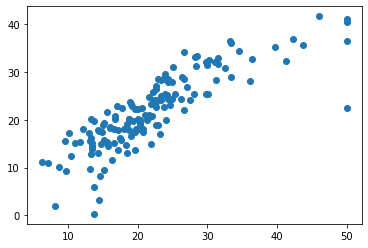

In [111]:
plt.scatter(Real_Values,predictions)

## Residual Histogram

<AxesSubplot:ylabel='Density'>

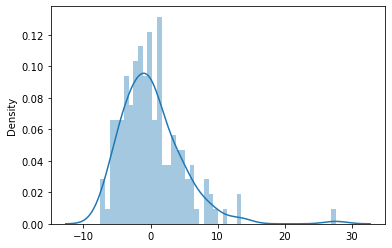

In [112]:
sns.distplot((y_test-predictions),bins=50)

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [113]:
from sklearn import metrics

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.3823284570439562
MSE: 21.900224223458675
RMSE: 4.679767539468032


In [118]:
#print(1- (np.sqrt(metrics.mean_squared_error(y_test, predictions))))
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.7236761965746159
